In [203]:
from tqdm import tqdm
import numpy as np
import eval7

from zerosum.pkr.abstraction.kmeans import kmeans, kmeanspp
from zerosum.pkr.abstraction.hands import equity, potential, rhand, emd

In [212]:
import numpy as np


d = 10
street = 3
future = 1
batch = 150000
equities = {}

for _ in tqdm(range(batch)):
    h = rhand(2 + street)
    equities[h] = equity(h[:2], h[2:], d, 150)

100%|██████████| 150000/150000 [02:15<00:00, 1110.22it/s]


<BarContainer object of 10 artists>

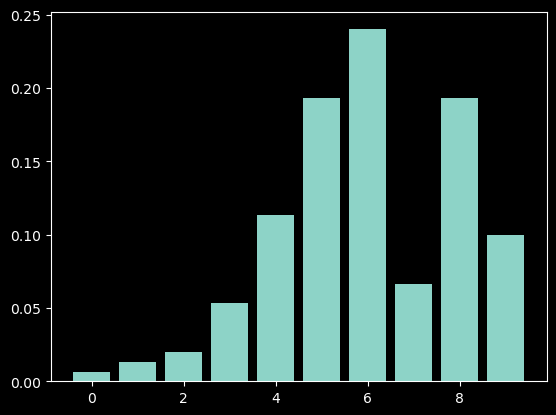

In [213]:
import matplotlib.pyplot as plt
import random

hs = list(equities.values())
rd = random.randint(0, len(hs) - 1)
plt.bar(range(d), hs[rd])

In [214]:
import math


def cost(vecs, centroids):
    cost = 0
    for v in vecs:
        md = math.inf
        for c in centroids:
            md = min(md, emd(v, c))
        cost += md ** 2
    return cost / len(vecs)

In [217]:
clusters = 30

vecs = np.vstack(list(equities.values()))

#mc = math.inf
#mcentroids = None
#for _ in range(10):
#    centroids = kmeanspp(vecs, clusters)
#
#    c = cost(vecs, centroids)
#    print(c)
#
#    if c < mc:
#        mc = c
#        mcentroids = centroids
#centroids = mcentroids

centroids = kmeanspp(vecs, clusters)
centroids, labels = kmeans(vecs, centroids, 10000)
ncentroids = []
bad = 0
for label, centroid in enumerate(centroids):
    if np.sum(labels == label) > 10:
        ncentroids.append(centroid)
    else:
        bad += 1
centroids = np.vstack(ncentroids)

c = cost(vecs, centroids)
print(c)

0.06390591624800239


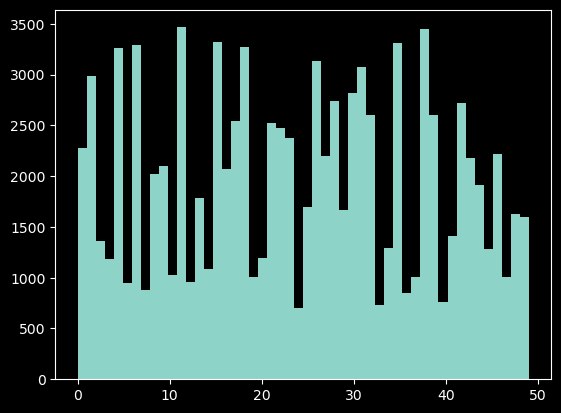

In [187]:
plt.hist(labels, bins=clusters);

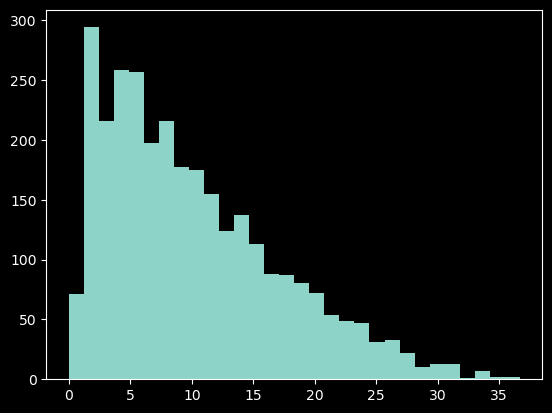

In [188]:
dists = []
for i, j in iter(lambda: random.sample(list(labels), 2), None):
    dists.append(emd(centroids[i], centroids[j]))

    if len(dists) > 3000:
        break

plt.hist(dists, bins=30);

<BarContainer object of 50 artists>

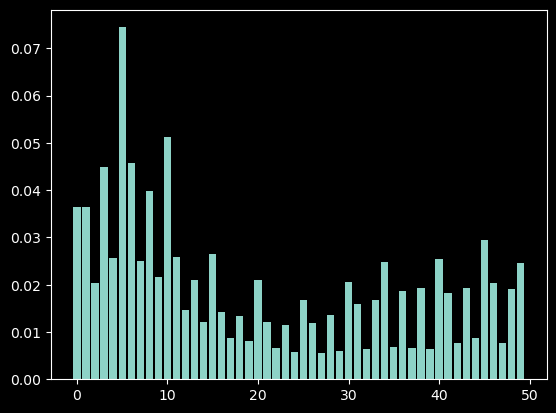

In [197]:
rd = random.randint(0, len(centroids) - 1)
plt.bar(range(d), centroids[rd])

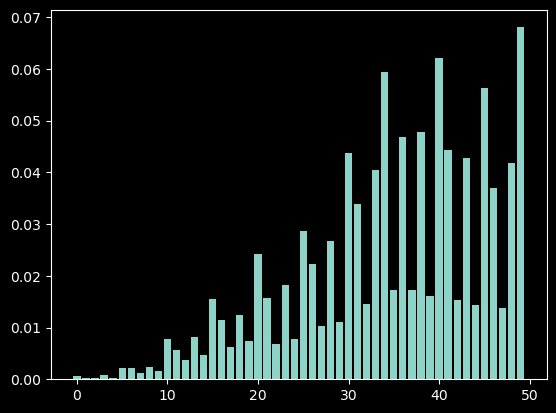

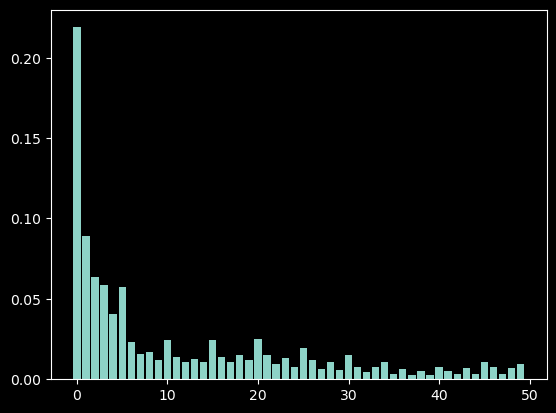

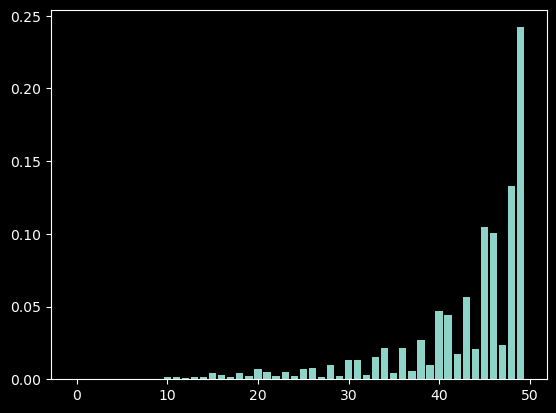

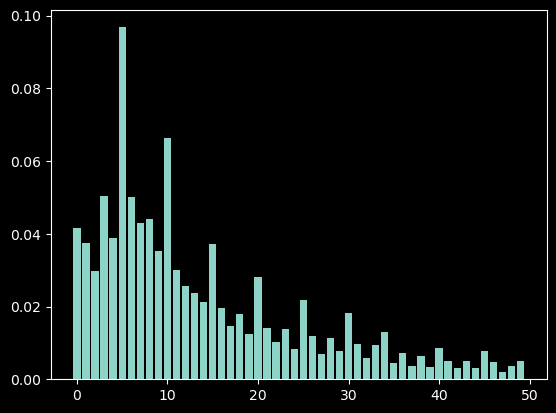

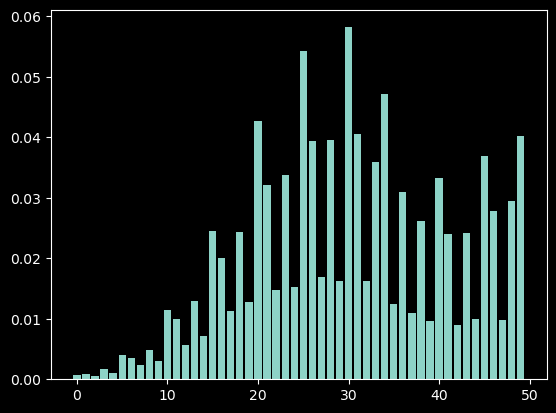

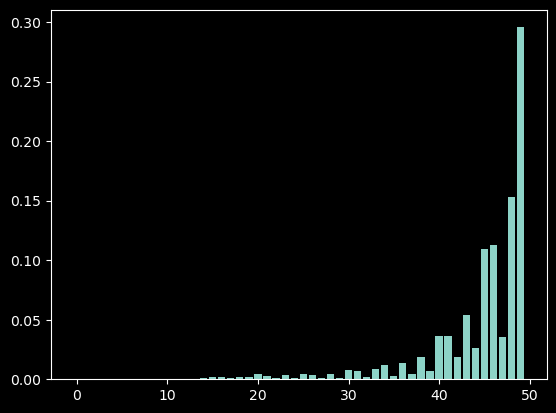

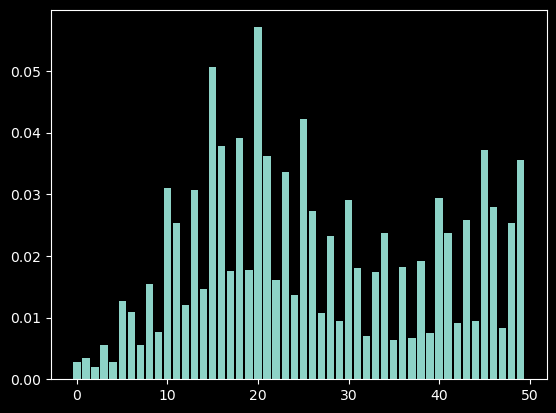

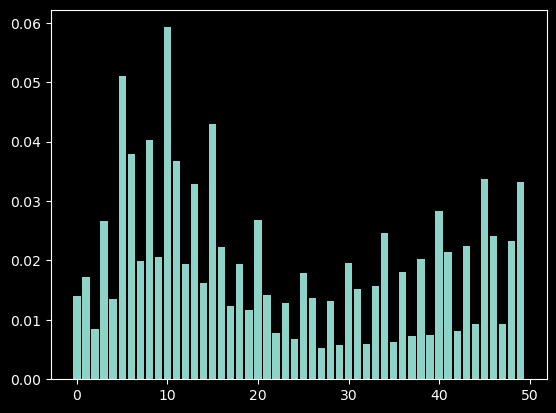

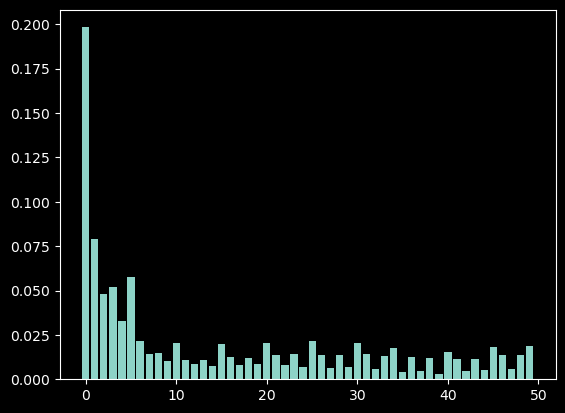

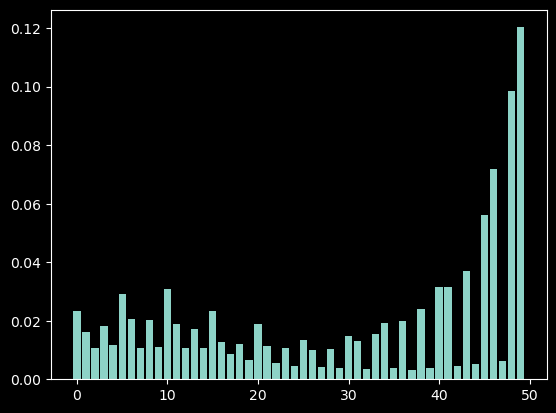

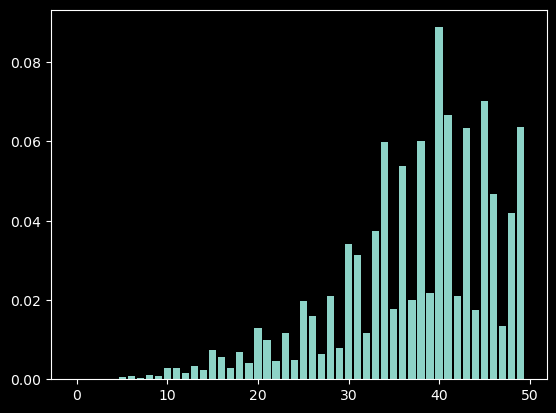

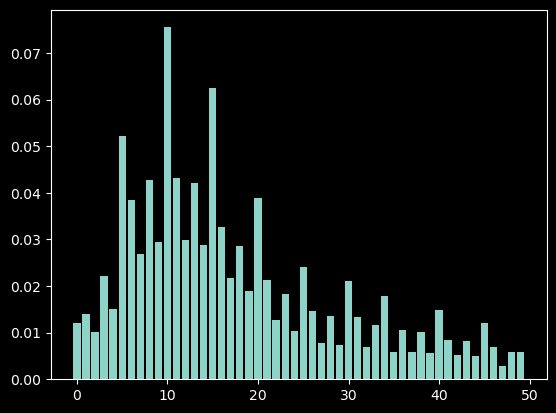

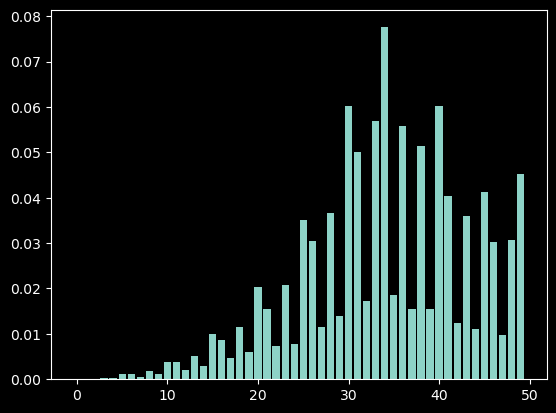

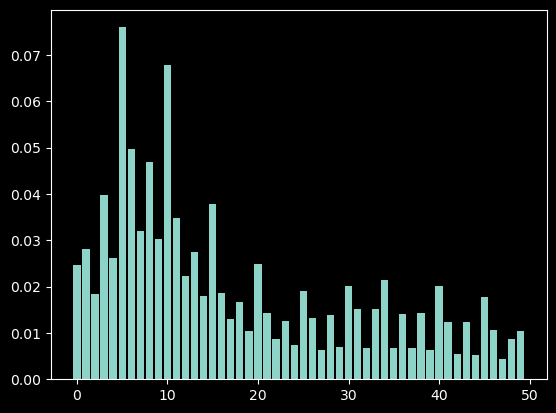

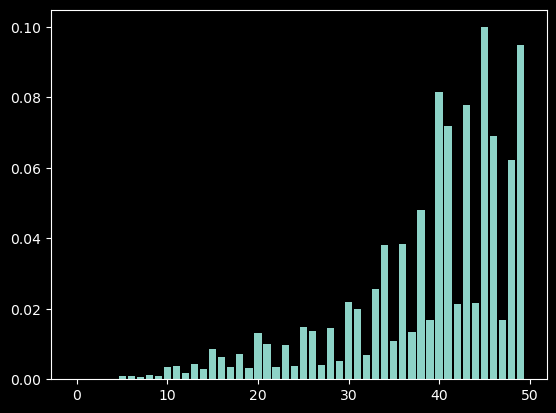

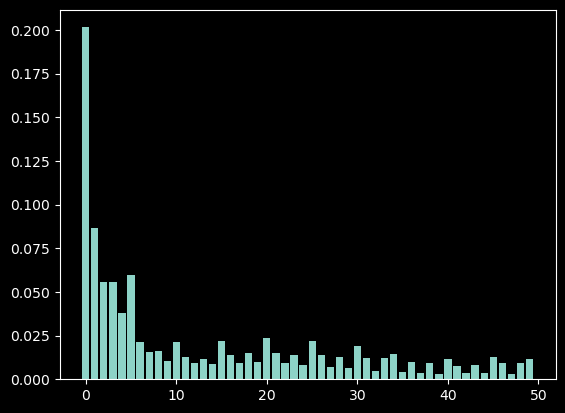

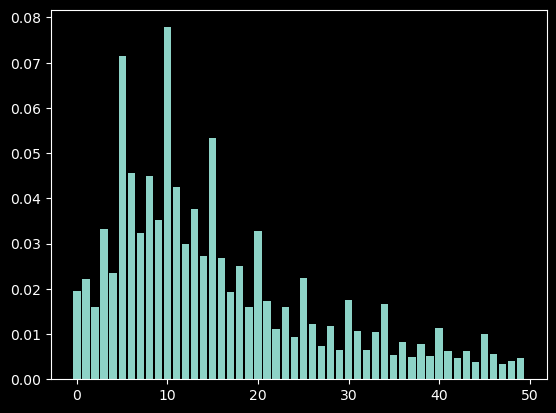

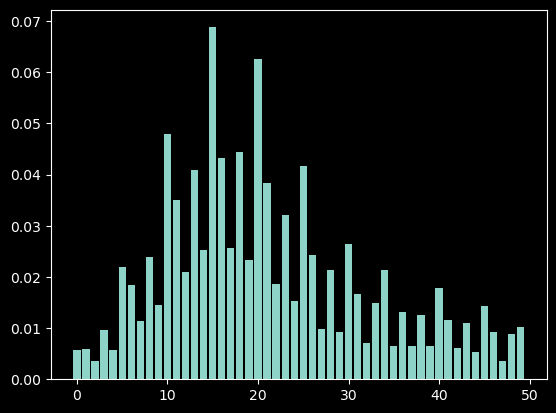

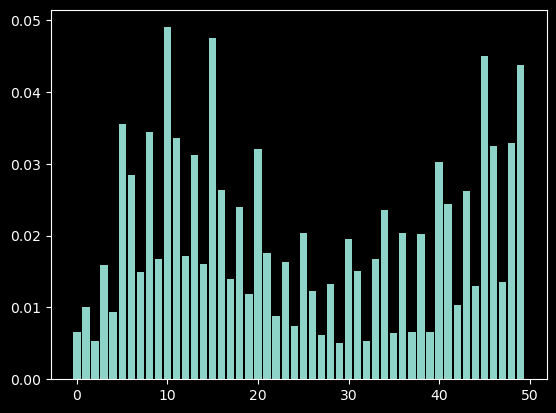

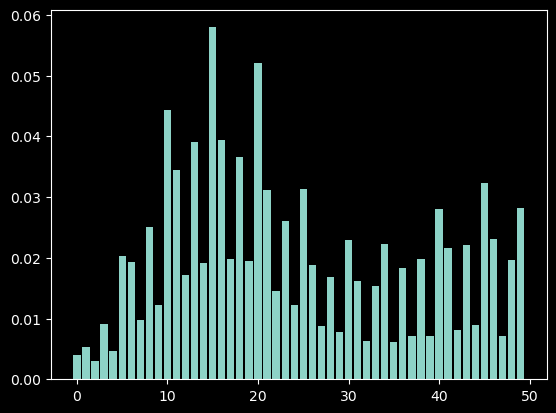

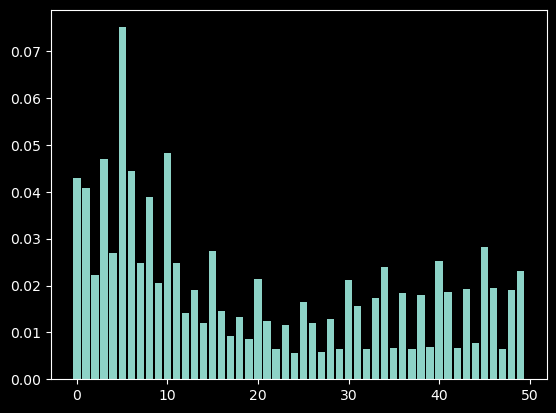

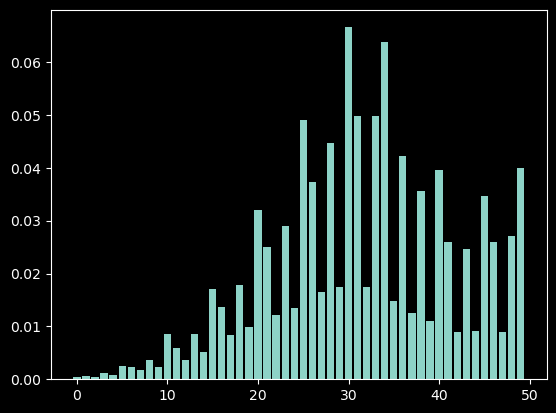

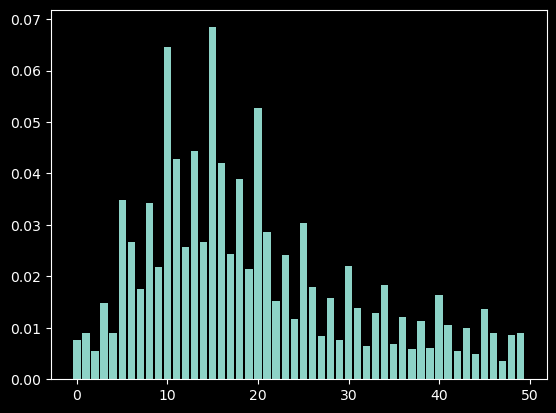

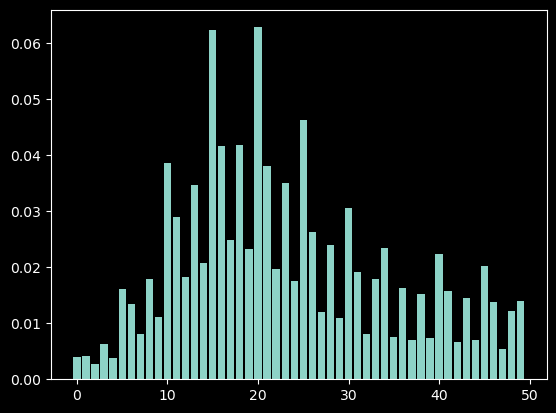

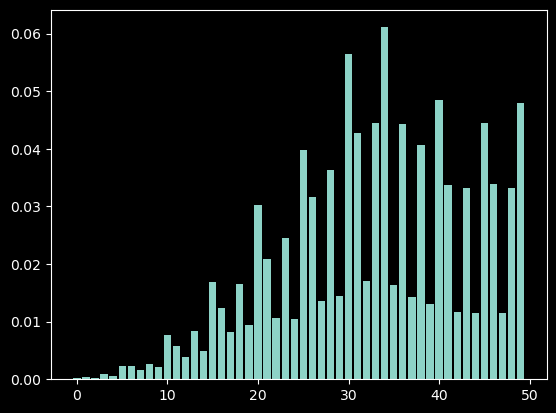

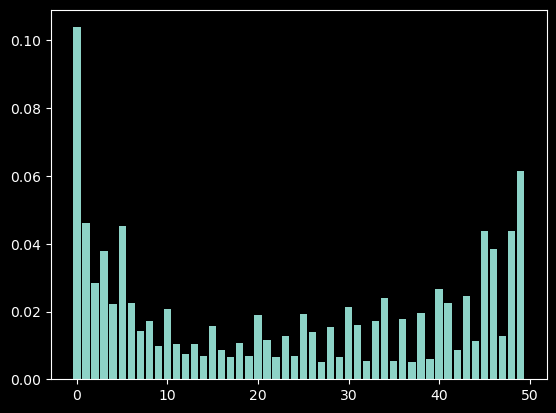

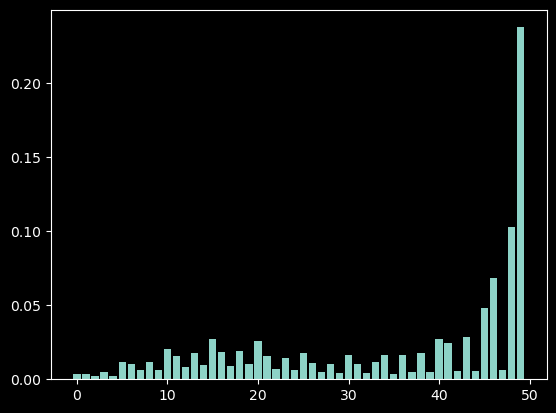

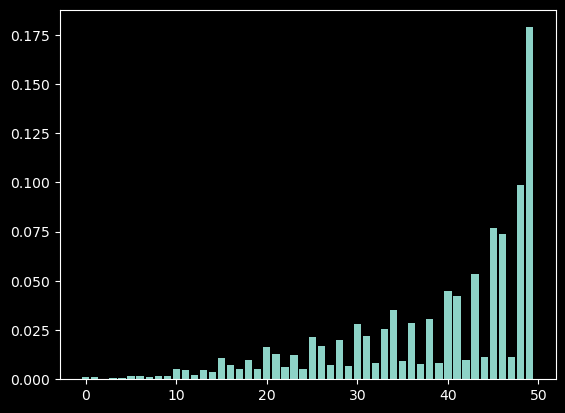

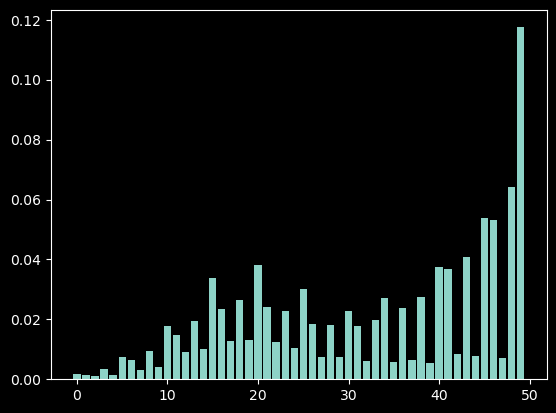

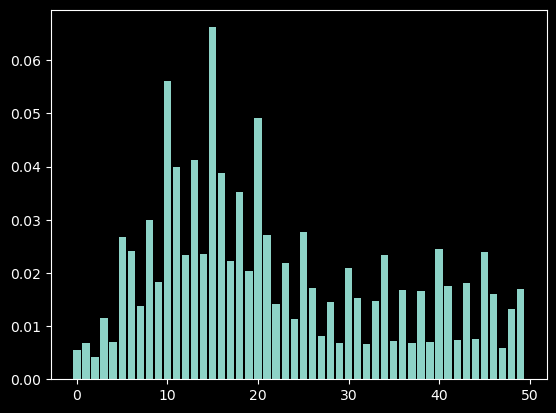

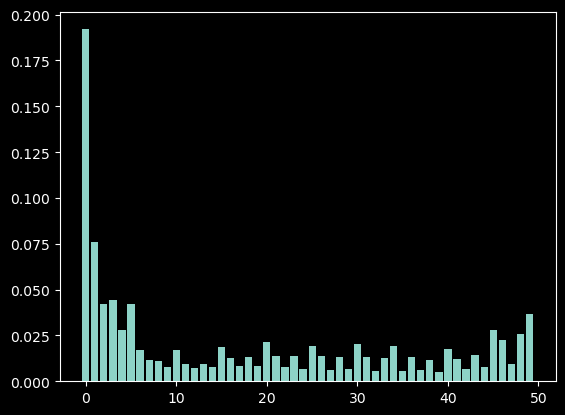

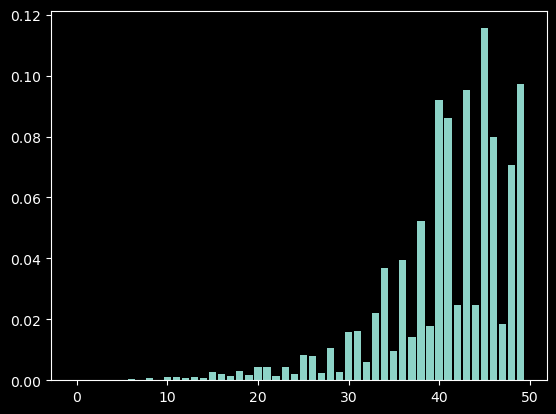

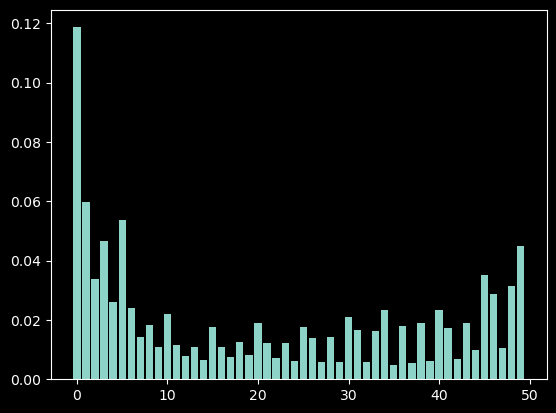

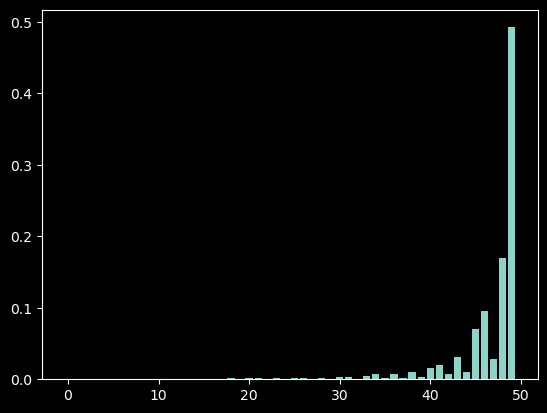

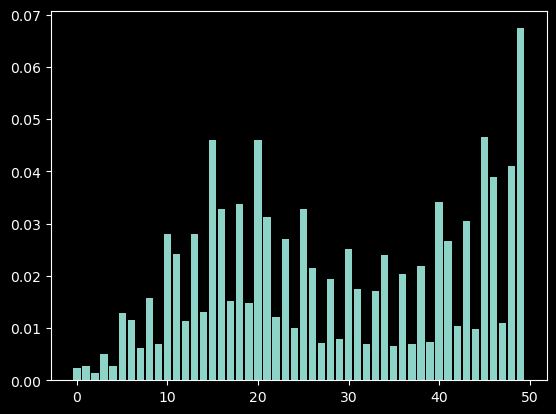

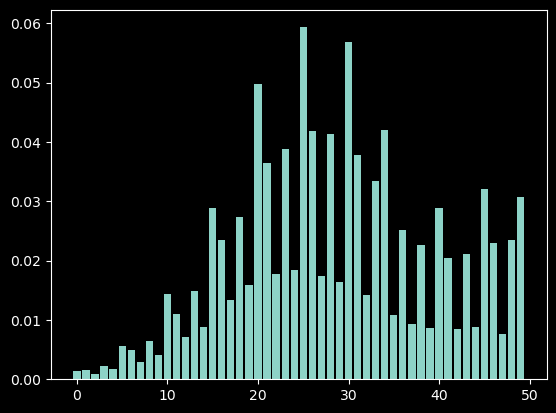

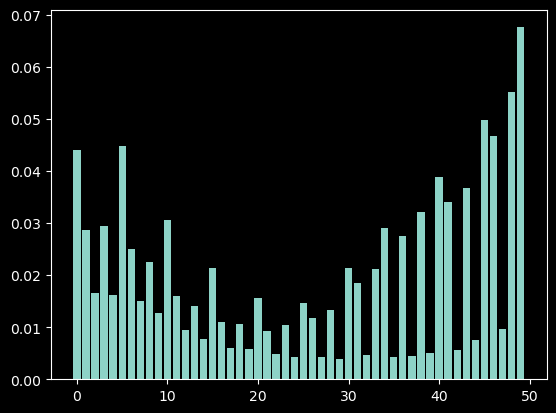

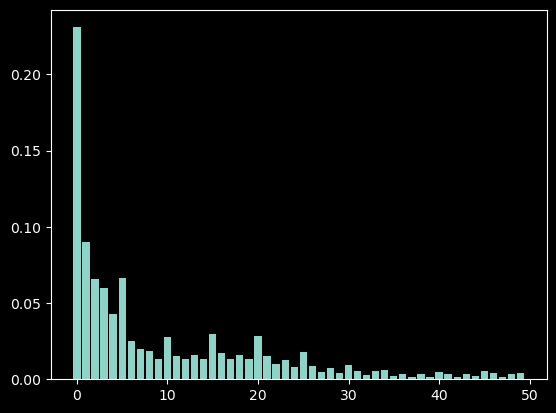

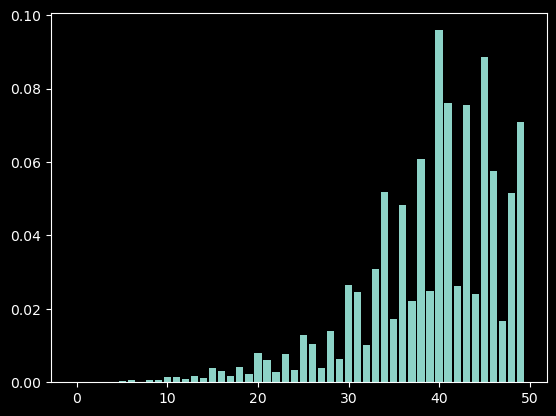

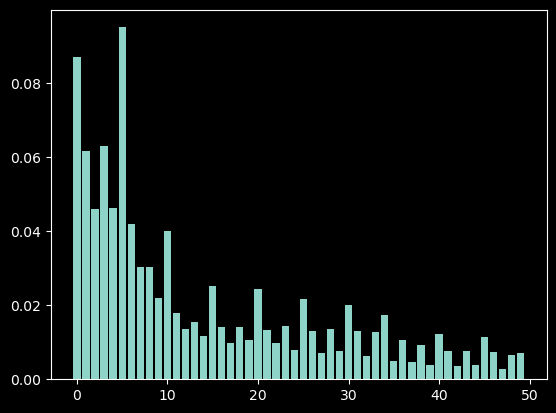

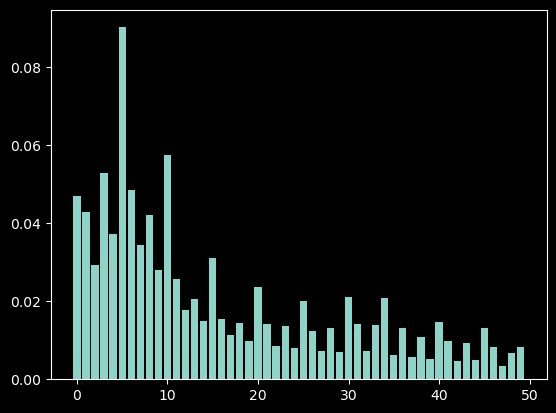

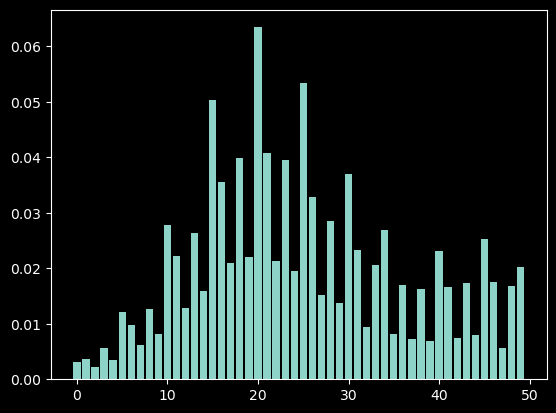

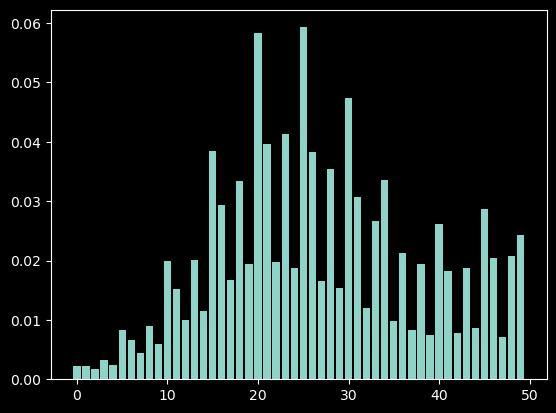

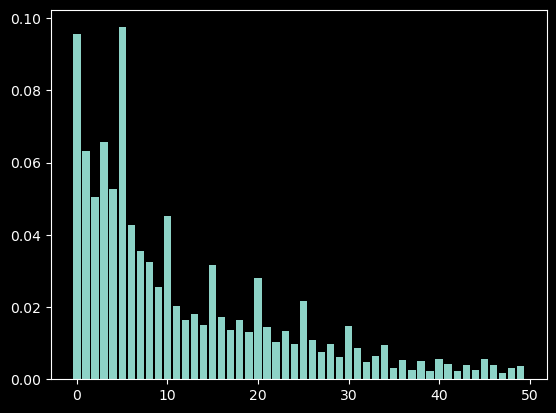

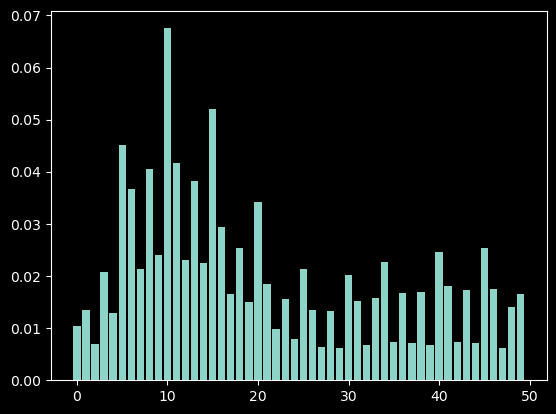

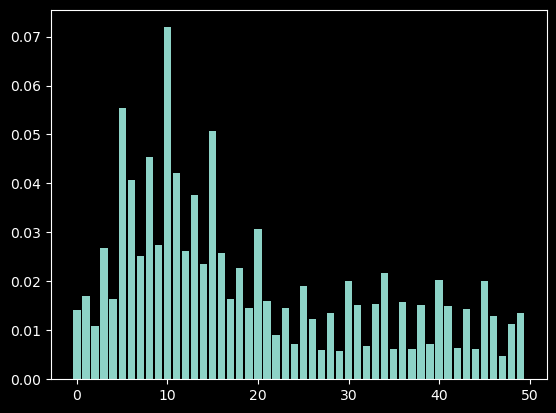

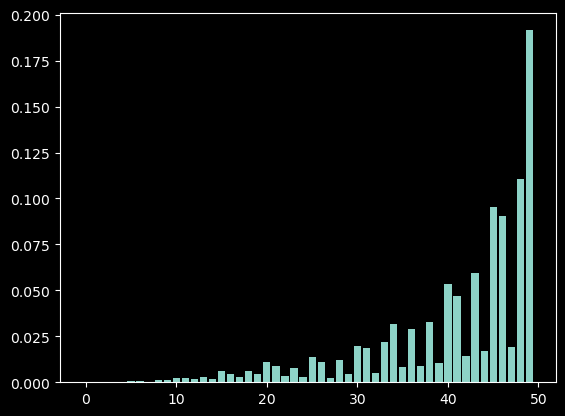

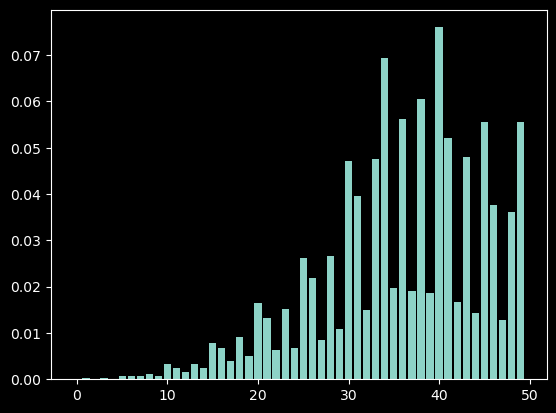

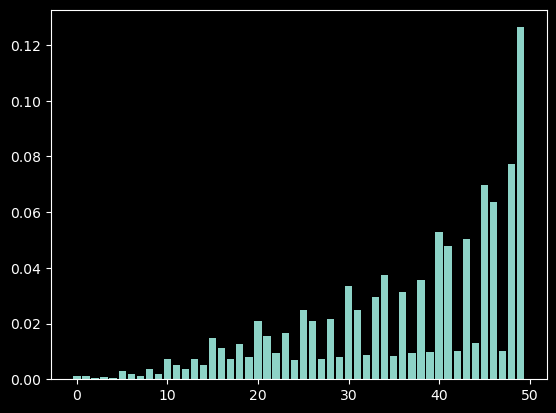

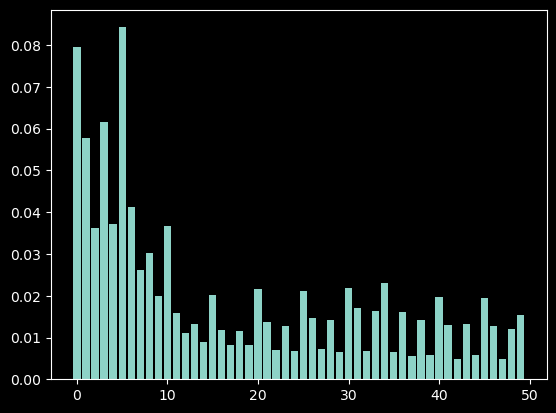

In [30]:
import matplotlib.pyplot as plt

for c in centroids:
    plt.bar(range(d), c)
    plt.show()